input= elevation1.txt
output= reg_elevation1.txt
output2= elevation1_with_dis.txt
output3= shift_GPRelev1.txt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Elevation  398 non-null    float64
 1   Distance   0 non-null      float64
dtypes: float64(2)
memory usage: 6.3 KB

+++++++++++++++++++++++++++++++++
depth/samples= 0.041690988085937505
+++++++++++++++++++++++++++++++++

   Elevation  Distance
0    1415.70         1
1    1415.70         2
2    1415.71         3
3    1415.71         4
4    1415.71         5


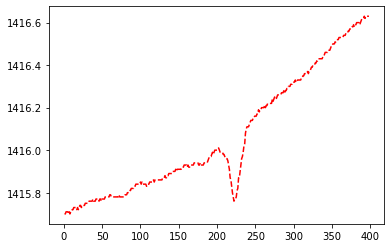

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline


#==================INPUT INFORNAMTION===================
number = "1"
i_fn = "elevation"
i_fn2 = i_fn + number
ext = ".txt"
i_fn3 = i_fn2 + ext
print("input=",i_fn3)
o_fn  = "reg_"+ i_fn2 + ext
o_fn2 = i_fn2 + "_with_dis" + ext
o_fn3 = "shift_GPRelev"+ number + ext
print("output=",o_fn)
print("output2=",o_fn2)
print("output3=",o_fn3)

#read *.txt file
data = pd.read_csv(i_fn3, sep = "\t", names=['Elevation', 'Distance'],engine='python', encoding = "cp949")
data.info()

#distance
#dis = 99.155894
#dis = 99.353612
#dis = 79.285171
dis = 75.519084

GNSS_points = 398
GPR_points = 1522
#=======================================================


#distance_interval
d_dis = dis/len(data)

#insert distance data 
data['Distance']=range(1,len(data)+1)
#data.head()

#depth/samples
print("")
print("+++++++++++++++++++++++++++++++++")
samples = 512
c=3*(10**8)
permit=9.0
t_window = 213.457859*10**(-9)
depth = t_window*(c/np.sqrt(permit))
d_depth = depth / samples
print("depth/samples=", d_depth)
print("+++++++++++++++++++++++++++++++++")
print("")

#data["Distance"] = data["Distance"] * d_dis
#data.head()

print(data.head())
x = np.c_[data['Distance']] #np.c_ slice a matrix to use values
y = np.c_[data['Elevation']]
plt.plot(x,y,'r--')

class:  ndarray
shape:  (802, 2)
strides:  (16, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x558fd0cc4ae0
byteorder:  little
byteswap:  False
type: float64

class:  ndarray
shape:  (398, 2)
strides:  (16, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x558fd0cc31c0
byteorder:  little
byteswap:  False
type: float64


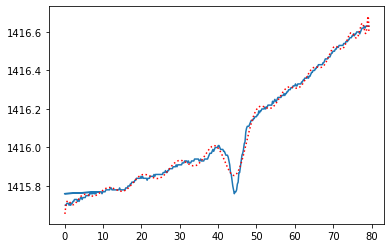

In [3]:
poly = preprocessing.PolynomialFeatures(degree=48,include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly',poly), ('scal',scaler),('lin', lin_reg2)])
pipeline_reg.fit(x,y)

GPR_x = range(1,GPR_points+1,1)
GPR_x2 = np.array(GPR_x)
#GPR_x3=GPR_x2 * 602.0/1003.0
GPR_x3=GPR_x2 * GNSS_points/GPR_points

GPR_x4=np.c_[GPR_x3]

curve = pipeline_reg.predict(GPR_x4)
curve2 = np.c_[curve]

#np.info(curve2)
#print("")
#np.info(GPR_x4)
#plt.plot(GPR_x4,curve2, 'r--')

GPR_elev = np.concatenate((GPR_x4*d_dis,curve2), axis=1)

dis2 = data["Distance"] * d_dis
dis3 = np.c_[dis2]
elev = np.concatenate((dis3,y), axis=1)


dis3[45] = 0.0
plt.plot(dis3,y)
plt.plot(GPR_x4*d_dis,curve2,'r:')

#regressioned elevation data
np.info(GPR_elev)
print("")
#original elevation data
np.info(elev)

[1486.99565152]
[1486.98365247]
[1486.971456]
[1486.95907364]
[1486.94651648]
[490.]
[489.]
[489.]
[489.]
[488.]
class:  ndarray
shape:  (1489, 1)
strides:  (8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x5568b251ced0
byteorder:  little
byteswap:  False
type: float64


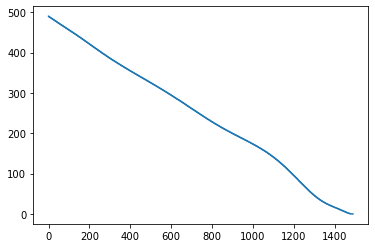

In [85]:
curve3=np.zeros(shape=(GPR_points,1))

for i in range(0,GPR_points,1):
    curve3[i] = np.round( (curve2[i] - np.min(curve2))/d_depth ) 
#    curve3[i] = np.round( (curve2[i] - curve2[0])/d_depth )    
#    curve3[i] = np.round( abs( (curve2[i] - curve2[1]) )/d_depth ) 

print(curve2[0])
print(curve2[1])
print(curve2[2])
print(curve2[3])
print(curve2[4])

print(curve3[0])
print(curve3[1])
print(curve3[2])
print(curve3[3])
print(curve3[4])

plt.plot(curve3)

np.info(curve3)

In [86]:
fmt = "%9.3f"
fmt2 = "%i"
np.savetxt(o_fn,GPR_elev,fmt=(fmt,fmt))
np.savetxt(o_fn2,elev)
np.savetxt(o_fn3,curve3,fmt=fmt2)